# 1-Loading libraries and data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [194]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2- Undertanding the data

In [195]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [197]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3648,9419-IPPBE,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85,No
4618,6350-XFYGW,Male,1,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,422.4,No
1706,0727-BNRLG,Male,0,No,No,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),97.65,6743.55,No
3975,2860-RANUS,Female,1,No,No,20,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.80,1727.5,Yes
3532,9474-PHLYD,Female,0,No,No,15,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,59.45,892.65,Yes


# The data set includes information about:

>> Customers who left within the last month – the column is called Churn

>> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

>> Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

>> Demographic info about customers – gender, age range, and if they have partners and dependents

In [198]:
df.shape

(7043, 21)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [200]:
col = df.columns.values
col

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# 3-  Data Manipulation

In [201]:
df = df.drop(['customerID'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [202]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.isna().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [203]:
df[df["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [204]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [205]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [206]:
df.fillna(df["TotalCharges"].median(), inplace=True)

In [207]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [208]:
df.shape

(7032, 20)

In [209]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [210]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [211]:
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [212]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("--------------------------------------------------")

gender: 2 unique values
gender
Male      3549
Female    3483
Name: count, dtype: int64
--------------------------------------------------
SeniorCitizen: 2 unique values
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64
--------------------------------------------------
Partner: 2 unique values
Partner
No     3639
Yes    3393
Name: count, dtype: int64
--------------------------------------------------
Dependents: 2 unique values
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
--------------------------------------------------
PhoneService: 2 unique values
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
--------------------------------------------------
MultipleLines: 3 unique values
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
--------------------------------------------------
InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2416
No          

# 4- Data Visualization

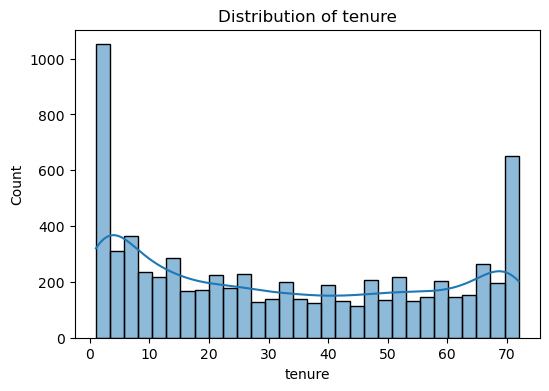

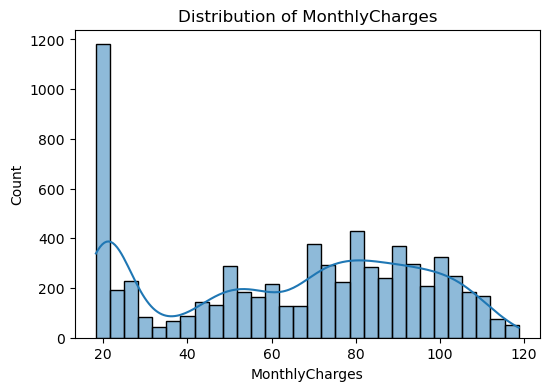

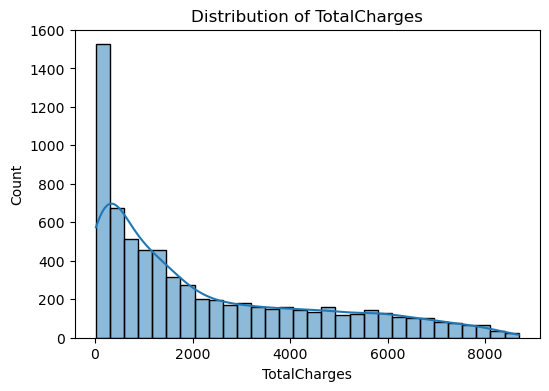

In [213]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of Numerical Features
The distributions help you spot outliers and see if features are skewed. For example, tenure may be right-skewed, indicating most customers are relatively new.

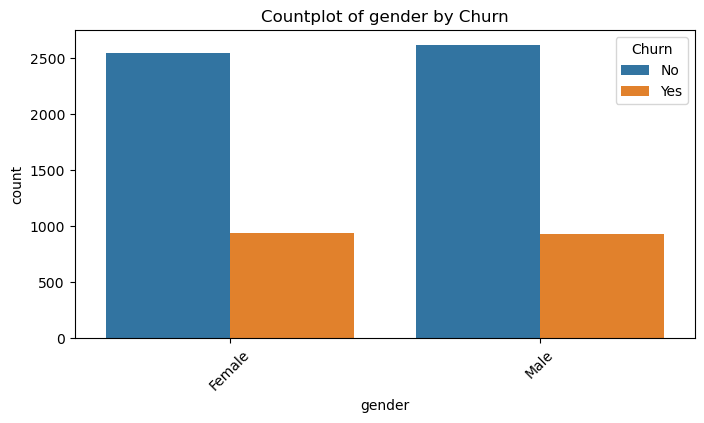

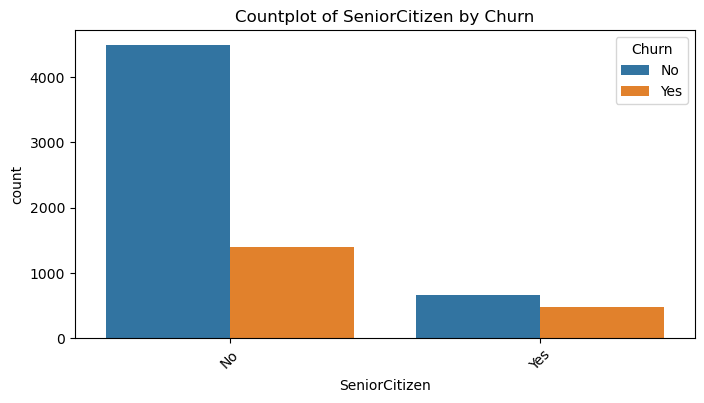

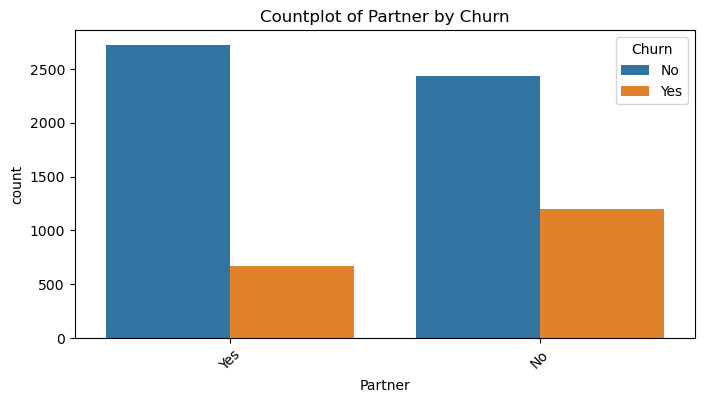

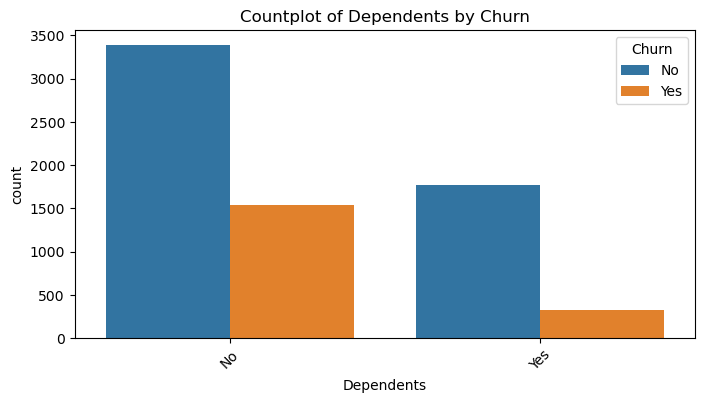

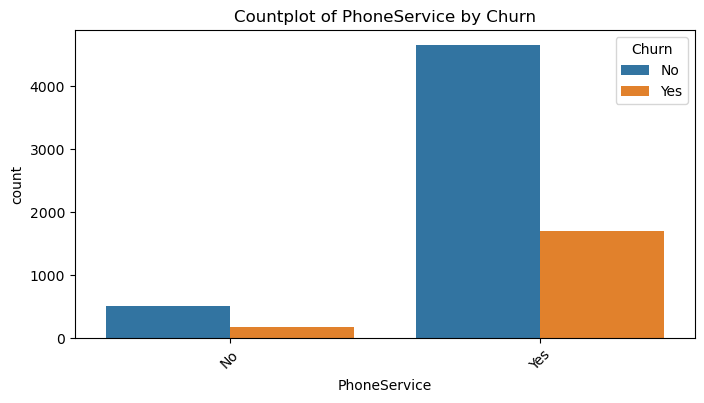

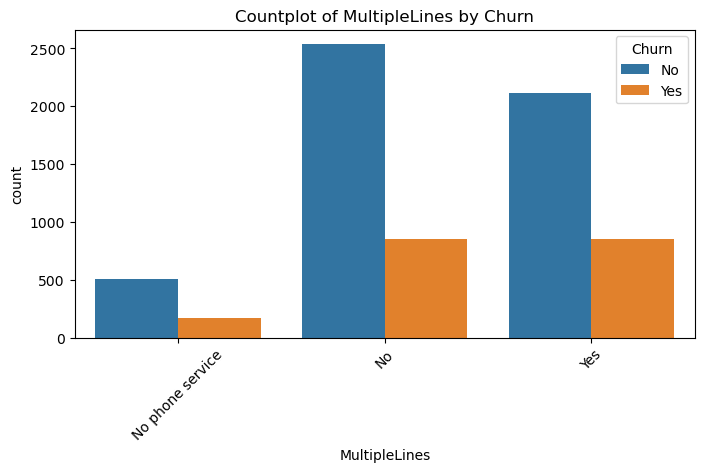

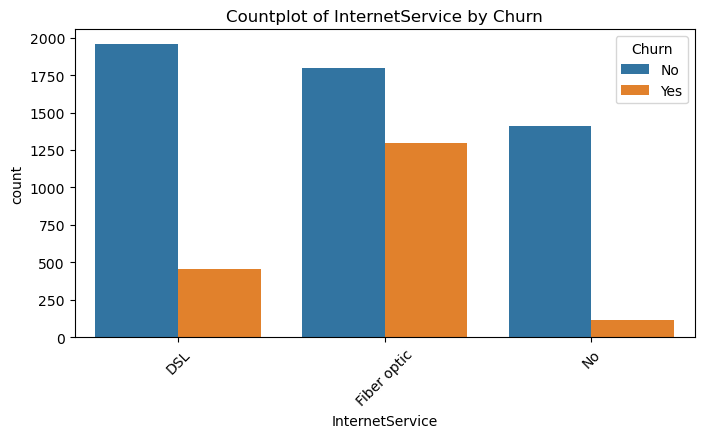

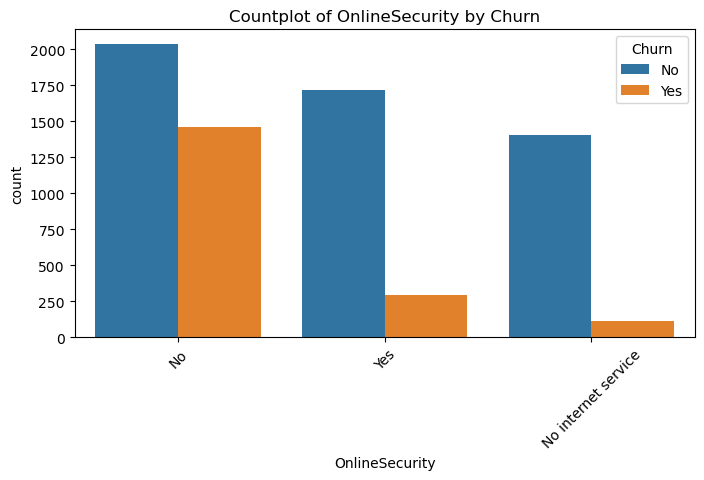

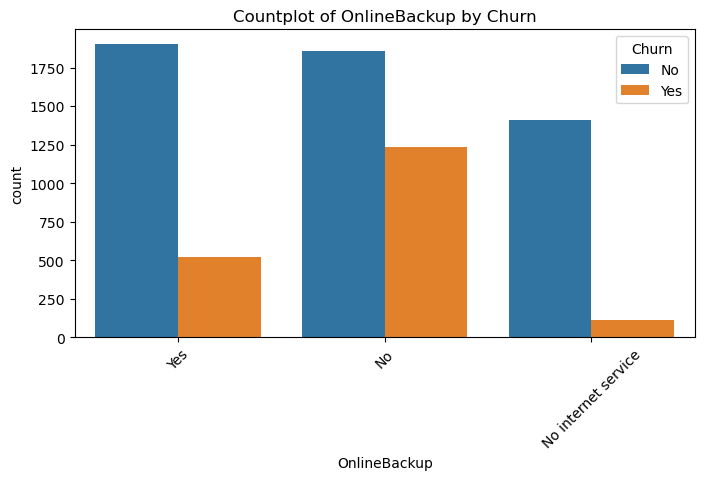

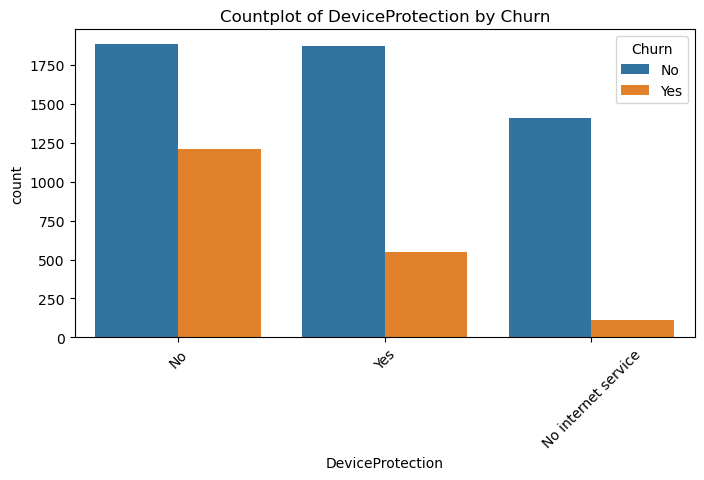

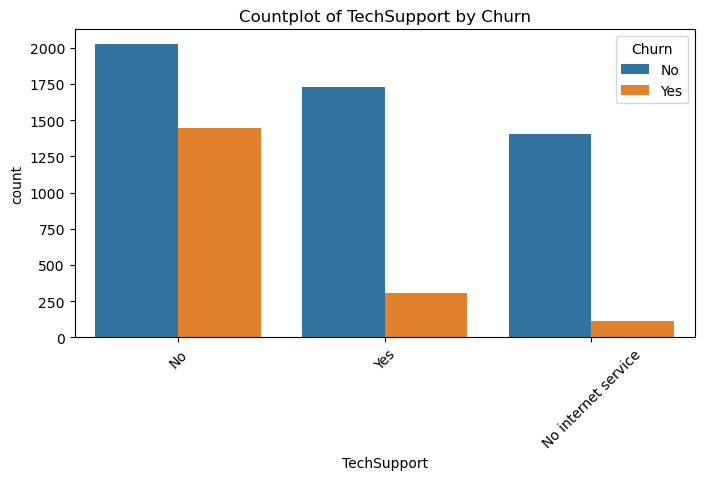

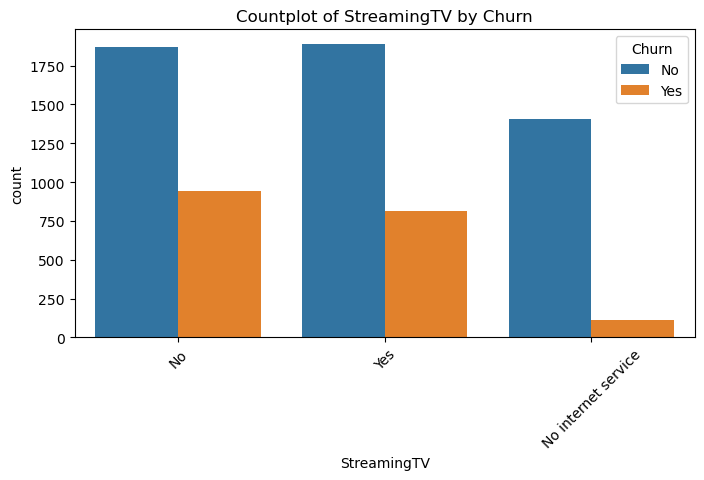

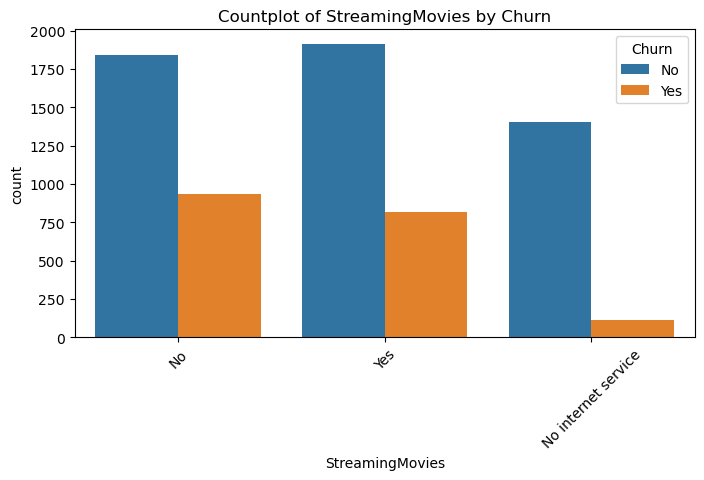

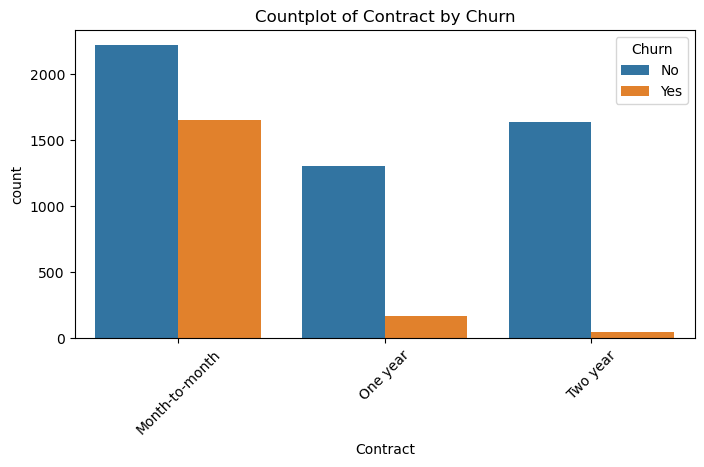

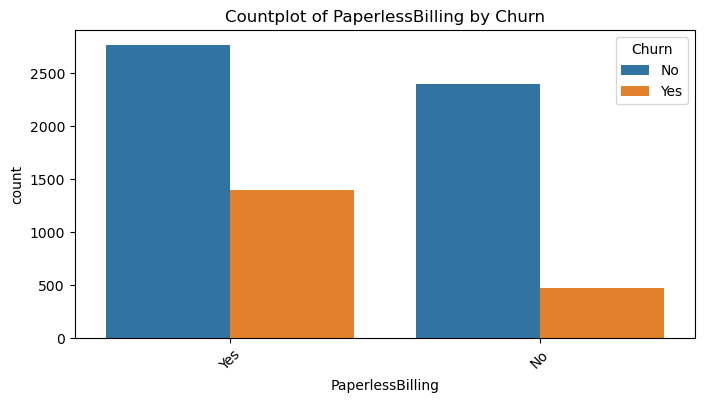

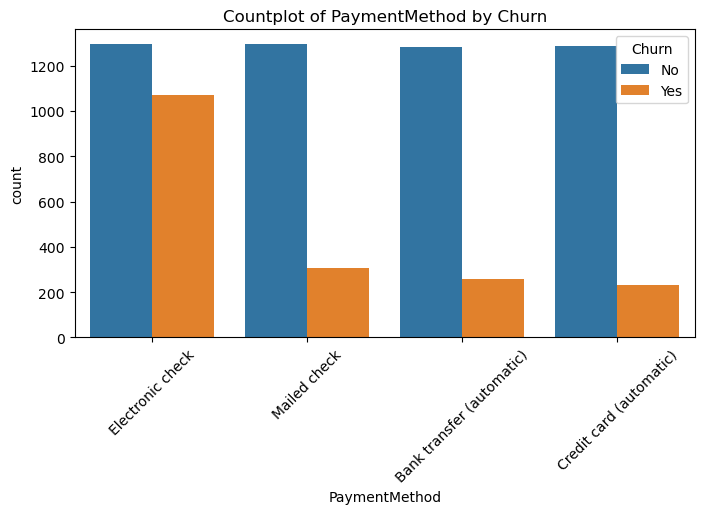

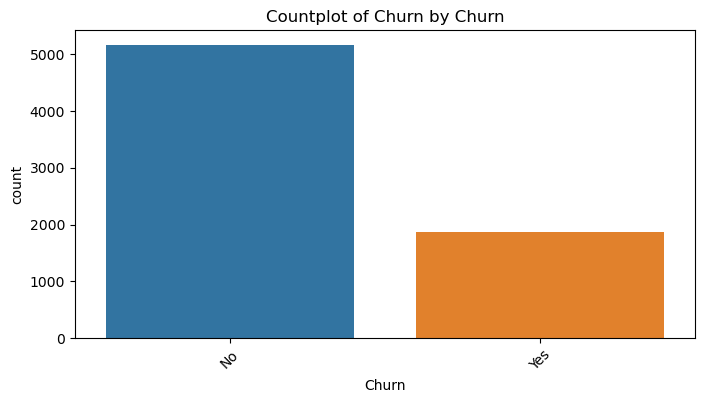

In [214]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Countplot of {col} by Churn')
    plt.xticks(rotation=45)
    plt.show()

# Categorical Features vs Churn (Countplots)
1- Contract Type: Month-to-month contracts have a much higher churn rate compared to one-year or two-year contracts.

2- Payment Method: Certain payment methods (like electronic check) are associated with higher churn.

3- Services: Customers who do not subscribe to additional services (like online security, tech support, etc.) are more likely to churn.


# Demographics
1- SeniorCitizen: Senior citizens may have a slightly higher churn rate.

2- Partner/Dependents: Customers without partners or dependents are more likely to churn.

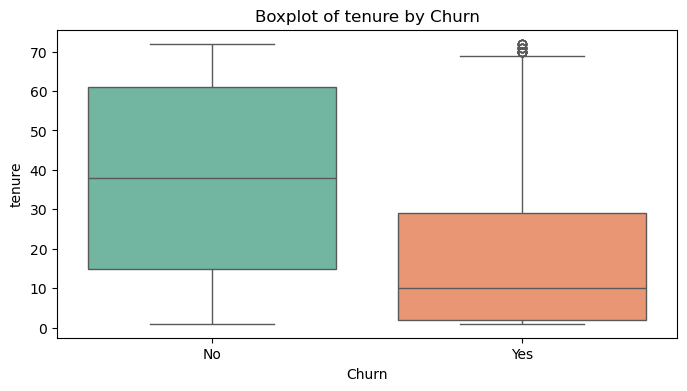

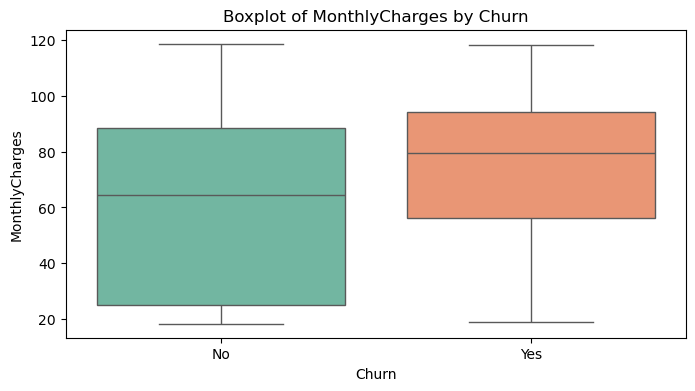

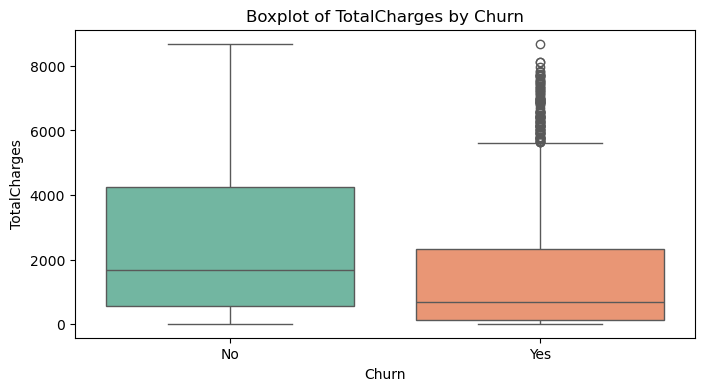

In [215]:
# visualization between numerical features and target variable
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

# Numerical Features vs Churn (Boxplots)
1- Tenure: Customers with lower tenure (shorter time with the company) are more likely to churn. Those who stay longer tend to remain customers.

2- MonthlyCharges: Higher monthly charges are associated with a higher churn rate. Customers paying more are more likely to leave.

3- TotalCharges: Customers with lower total charges (i.e., less overall spending) are more likely to churn, likely because they are newer customers.

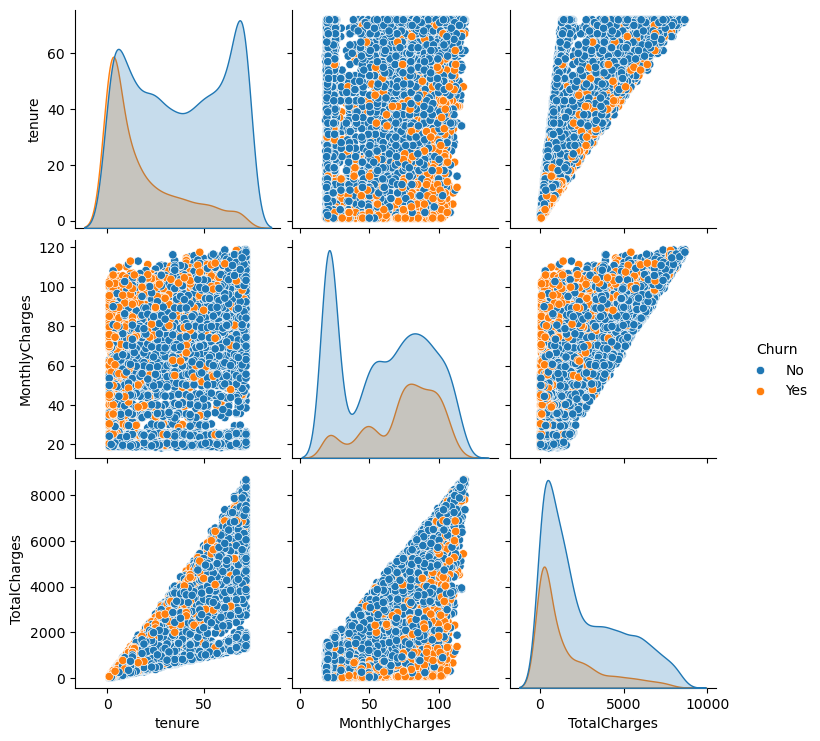

In [216]:
# pairplot
sns.pairplot(df, hue='Churn', vars=num_cols)
plt.show()

# Pairplot
1- There are visible clusters separating churned and non-churned customers based on numerical features.

2- Customers with low tenure and high monthly charges are more likely to churn.

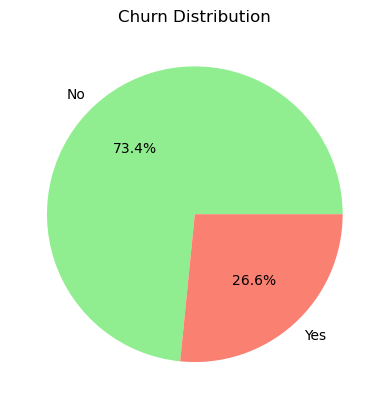

In [217]:
# Pie Chart for Churn Distribution
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

# Pie Chart for Churn Distribution
1- The dataset is imbalanced: most customers did not churn, while a smaller percentage did.

2- This highlights the need to consider class imbalance when building predictive models.


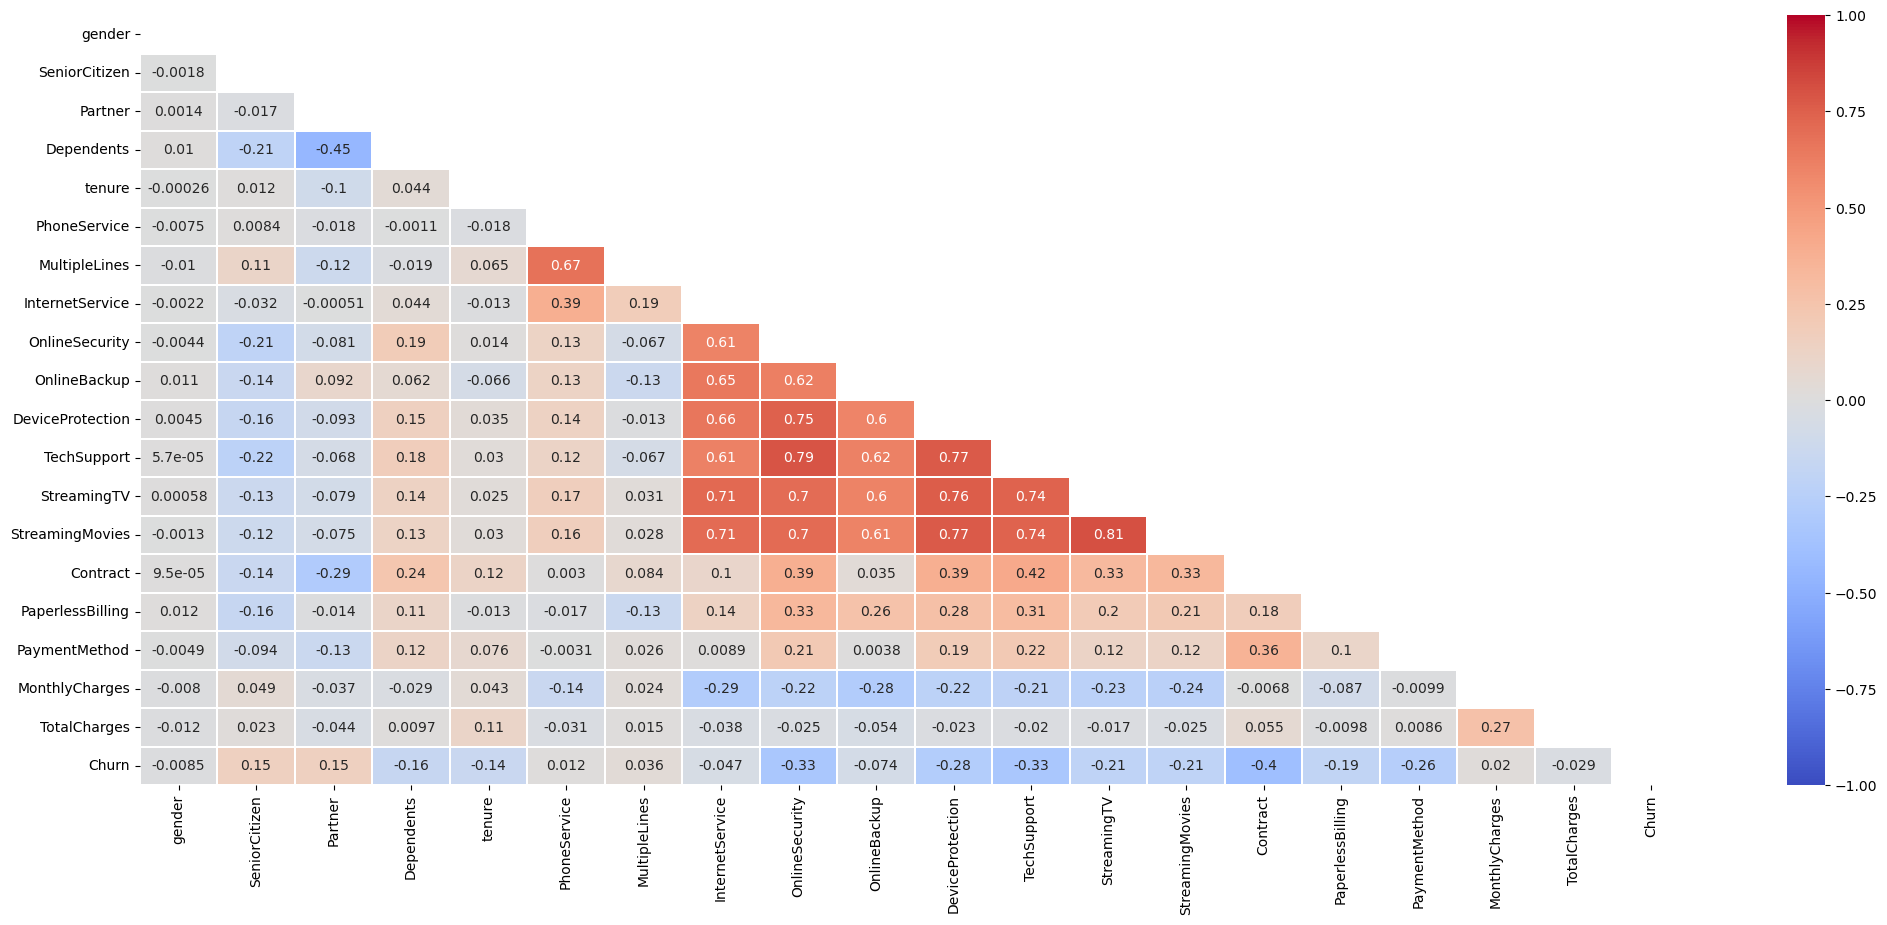

In [218]:
# Correlation Heatmap
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 5- Data Preprocessing

In [219]:
# data preprocessing
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [220]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [221]:
# corr with target variable
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [252]:
# split data
X = df.drop('Churn', axis=1)
y = df['Churn']

In [253]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [254]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4922, 19)
(2110, 19)
(4922,)
(2110,)


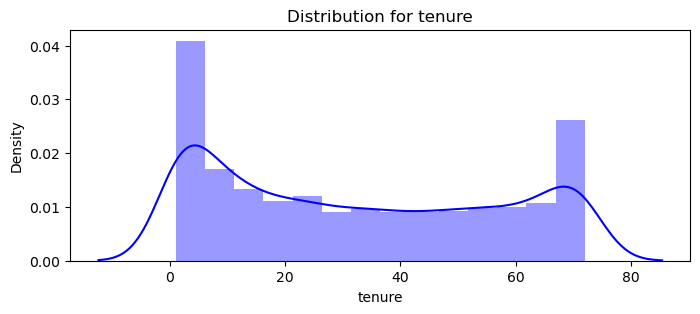

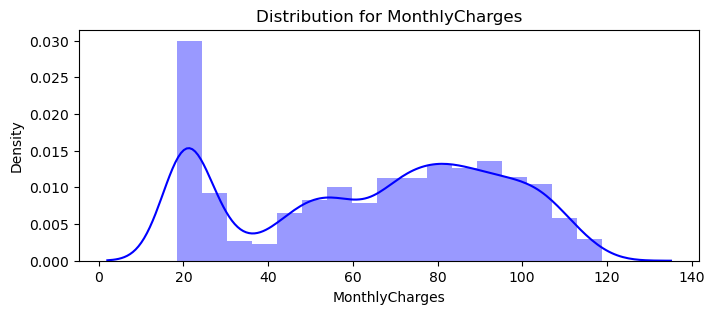

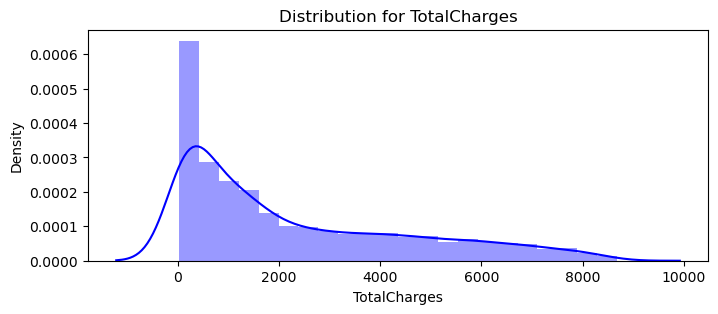

In [255]:
for col in num_cols:
    feature = col
    frame = x_train.copy()
    frame[feature] = x_train[feature]
    frame['Churn'] = y_train
    color = 'blue' if frame['Churn'].mean() < 0.5 else 'red'
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [256]:
# Standardizing numeric attributes
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

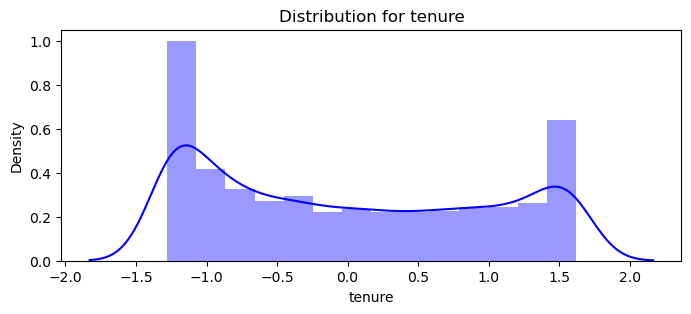

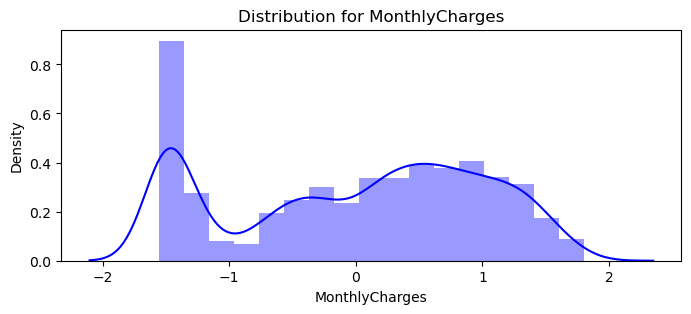

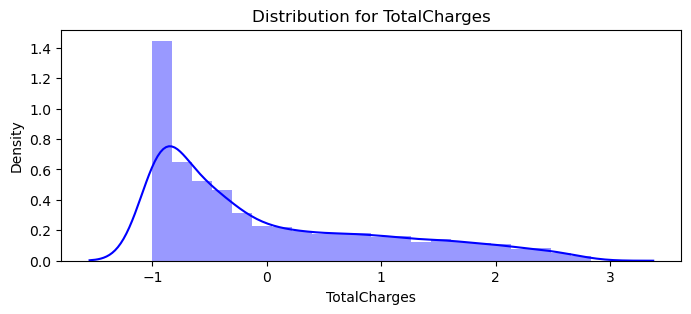

In [257]:
for col in num_cols:
    feature = col
    frame = x_train.copy()
    frame[feature] = x_train[feature]
    frame['Churn'] = y_train
    color = 'blue' if frame['Churn'].mean() < 0.5 else 'red'
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [258]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,-1.281139,1,2,1,0,0,0,0,0,2,0,1,2,0.726146,-0.970138
6565,1,0,1,0,1.170193,1,2,1,2,2,0,0,2,2,0,1,2,1.381503,1.809078
2212,1,0,0,0,-0.913439,1,0,2,1,1,1,1,1,1,1,0,3,-1.517446,-0.908597
2526,1,0,0,0,-1.281139,1,0,2,1,1,1,1,1,1,0,0,3,-1.520790,-0.999837
2751,0,0,1,1,-0.545739,0,1,0,0,0,0,0,0,0,0,1,3,-1.338561,-0.816253


In [262]:
scaler= StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [263]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,-1.281139,1,2,1,0,0,0,0,0,2,0,1,2,0.726146,-0.970138
6565,1,0,1,0,1.170193,1,2,1,2,2,0,0,2,2,0,1,2,1.381503,1.809078
2212,1,0,0,0,-0.913439,1,0,2,1,1,1,1,1,1,1,0,3,-1.517446,-0.908597
2526,1,0,0,0,-1.281139,1,0,2,1,1,1,1,1,1,0,0,3,-1.520790,-0.999837
2751,0,0,1,1,-0.545739,0,1,0,0,0,0,0,0,0,0,1,3,-1.338561,-0.816253


# 6- Modles

--- Logistic Regression ---
Accuracy: 0.8090047393364929
Recall: 0.5811051693404634
Precision: 0.659919028340081
F1 Score: 0.6180094786729858
Confusion Matrix:
 [[1381  168]
 [ 235  326]]


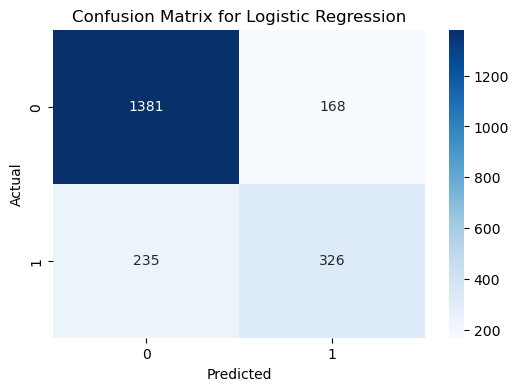

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



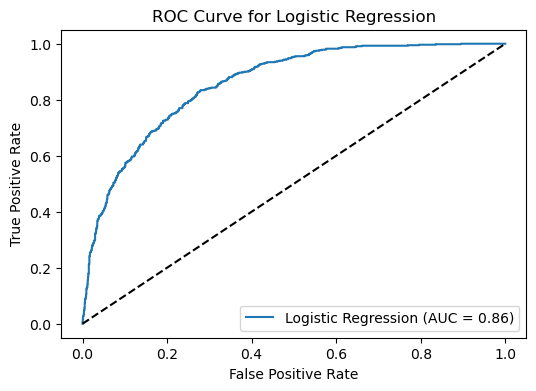

--- Naive Bayes ---
Accuracy: 0.7639810426540284
Recall: 0.768270944741533
Precision: 0.5394242803504381
F1 Score: 0.6338235294117647
Confusion Matrix:
 [[1181  368]
 [ 130  431]]


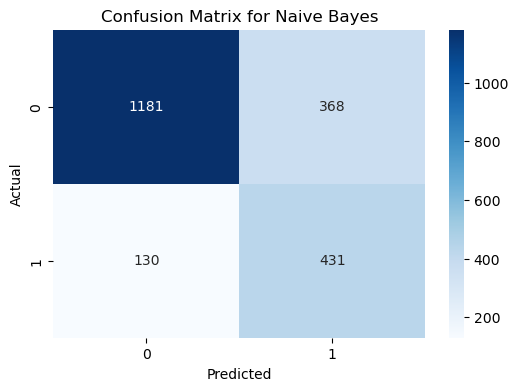

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1549
           1       0.54      0.77      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.80      0.76      0.77      2110



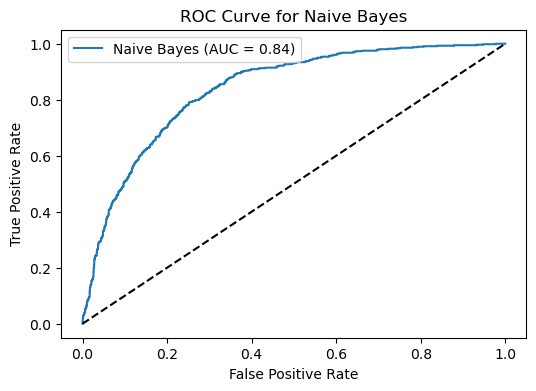

--- KNN ---
Accuracy: 0.7668246445497631
Recall: 0.5365418894830659
Precision: 0.5647279549718575
F1 Score: 0.5502742230347349
Confusion Matrix:
 [[1317  232]
 [ 260  301]]


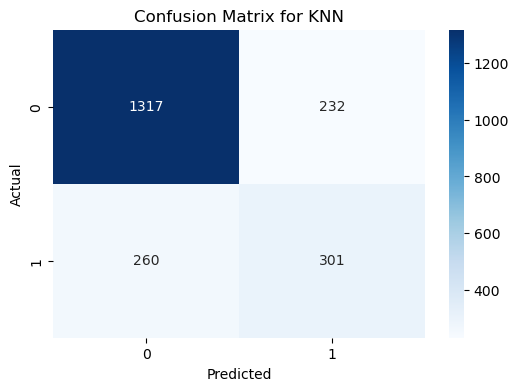

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1549
           1       0.56      0.54      0.55       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.76      2110



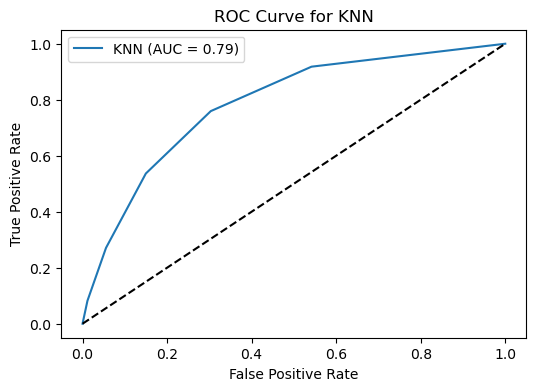

--- SVM ---
Accuracy: 0.8075829383886256
Recall: 0.5008912655971479
Precision: 0.6904176904176904
F1 Score: 0.5805785123966942
Confusion Matrix:
 [[1423  126]
 [ 280  281]]


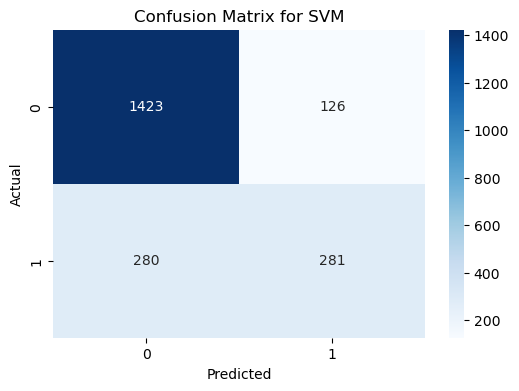

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



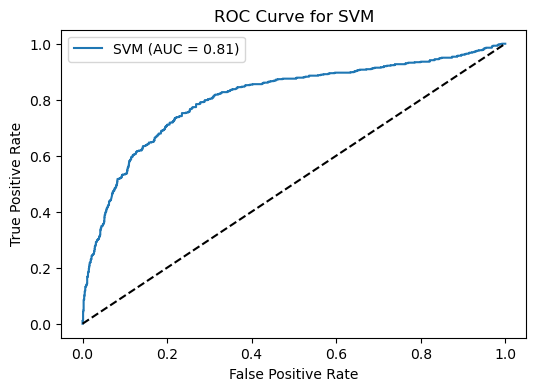

--- Decision Tree ---
Accuracy: 0.7241706161137441
Recall: 0.5222816399286988
Precision: 0.4827018121911038
F1 Score: 0.5017123287671232
Confusion Matrix:
 [[1235  314]
 [ 268  293]]


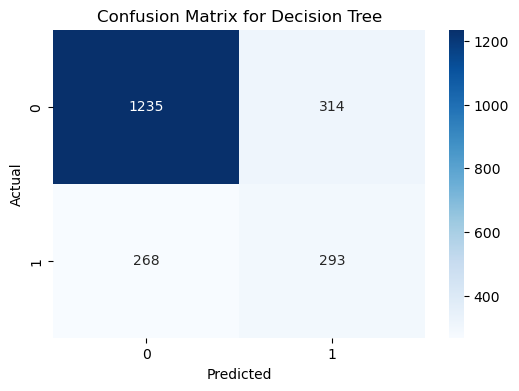

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.52      0.50       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.72      0.73      2110



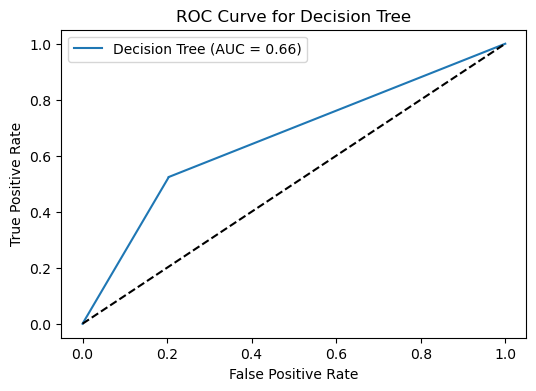

--- Random Forest ---
Accuracy: 0.7924170616113744
Recall: 0.5222816399286988
Precision: 0.6328293736501079
F1 Score: 0.572265625
Confusion Matrix:
 [[1379  170]
 [ 268  293]]


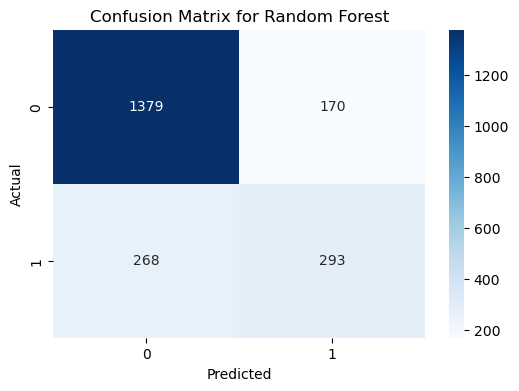

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



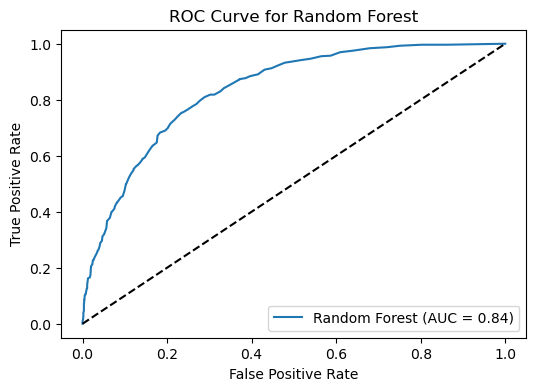

--- AdaBoost ---
Accuracy: 0.8075829383886256
Recall: 0.5454545454545454
Precision: 0.6695842450765864
F1 Score: 0.6011787819253438
Confusion Matrix:
 [[1398  151]
 [ 255  306]]


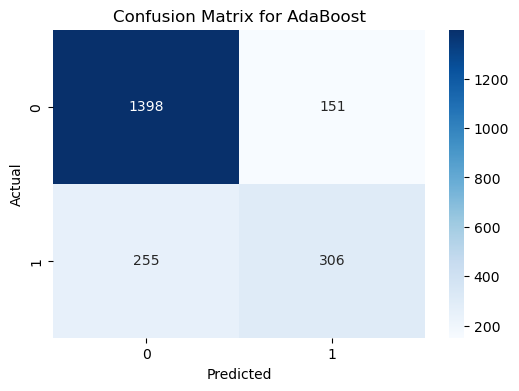

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



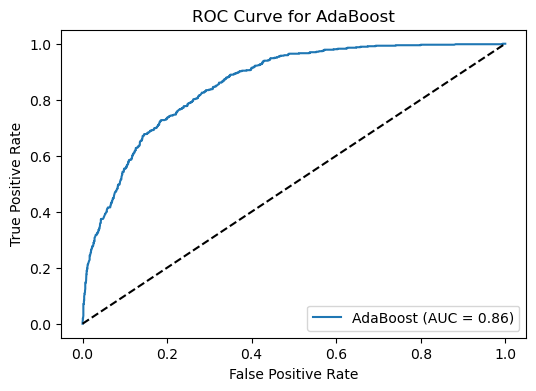

--- Gradient Boosting ---
Accuracy: 0.8080568720379147
Recall: 0.5508021390374331
Precision: 0.6688311688311688
F1 Score: 0.6041055718475073
Confusion Matrix:
 [[1396  153]
 [ 252  309]]


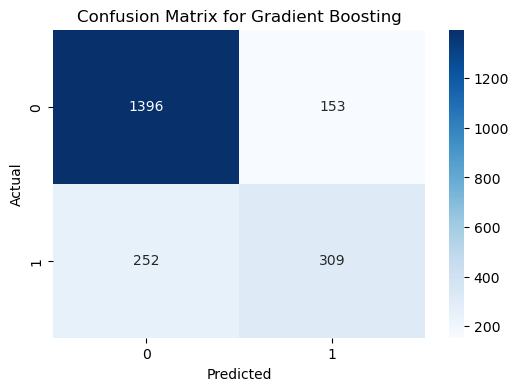

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



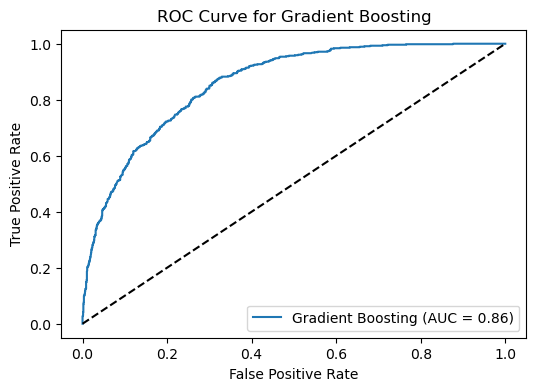

--- Extra Trees ---
Accuracy: 0.7767772511848341
Recall: 0.47771836007130125
Precision: 0.600896860986547
F1 Score: 0.5322740814299901
Confusion Matrix:
 [[1371  178]
 [ 293  268]]


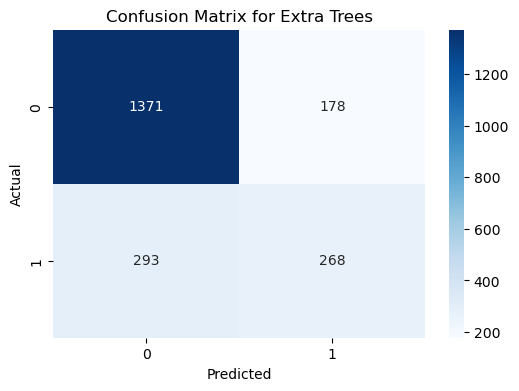

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



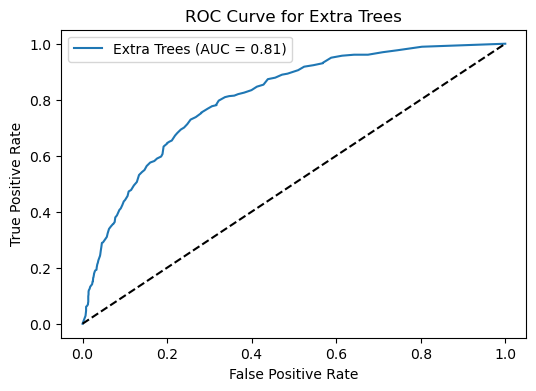

--- XGBoost ---
Accuracy: 0.7786729857819905
Recall: 0.5525846702317291
Precision: 0.5893536121673004
F1 Score: 0.5703771849126035
Confusion Matrix:
 [[1333  216]
 [ 251  310]]


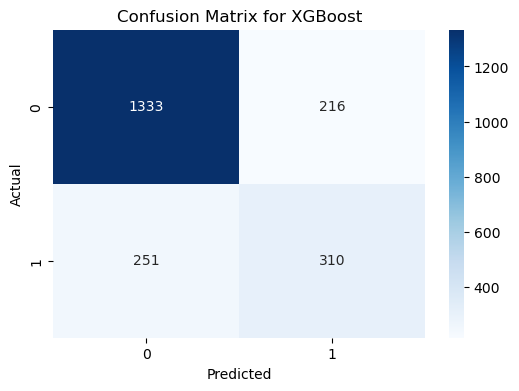

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.59      0.55      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.77      0.78      0.78      2110



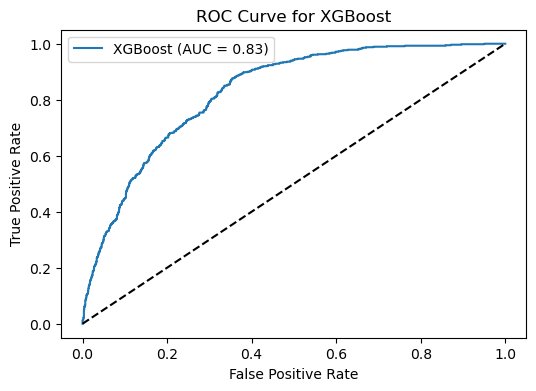

--- MLP ---
Accuracy: 0.7819905213270142
Recall: 0.5008912655971479
Precision: 0.6095444685466378
F1 Score: 0.5499021526418787
Confusion Matrix:
 [[1369  180]
 [ 280  281]]


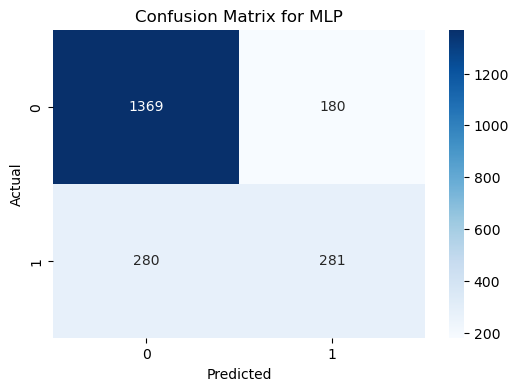

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1549
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



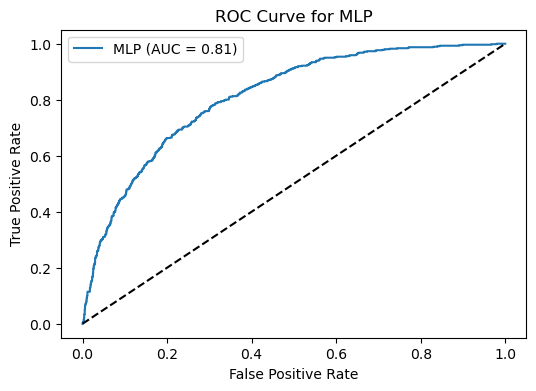

Comparison Table:


,Model,Accuracy,Recall,Precision,F1 Score
1,Naive Bayes,0.763981,0.768271,0.539424,0.633824
0,Logistic Regression,0.809005,0.581105,0.659919,0.618009
7,Gradient Boosting,0.808057,0.550802,0.668831,0.604106
6,AdaBoost,0.807583,0.545455,0.669584,0.601179
3,SVM,0.807583,0.500891,0.690418,0.580579
5,Random Forest,0.792417,0.522282,0.632829,0.572266
9,XGBoost,0.778673,0.552585,0.589354,0.570377
2,KNN,0.766825,0.536542,0.564728,0.550274
10,MLP,0.781991,0.500891,0.609544,0.549902
8,Extra Trees,0.776777,0.477718,0.600897,0.532274


In [ ]:
# modleling

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(max_iter=500)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Classification Report:\n", classification_report(y_test, y_pred))
    #ROC Curve
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {np.trapz(tpr, fpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print("="*40)

results_df = pd.DataFrame(results)
print("Comparison Table:")
display(results_df.sort_values(by="F1 Score", ascending=False))

Final Accuracy Score 
0.8165876777251185
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110

[[1399  150]
 [ 237  324]]


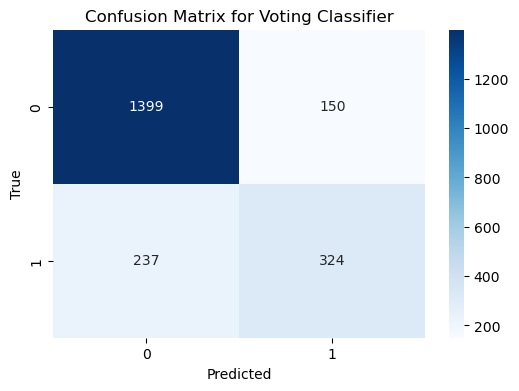

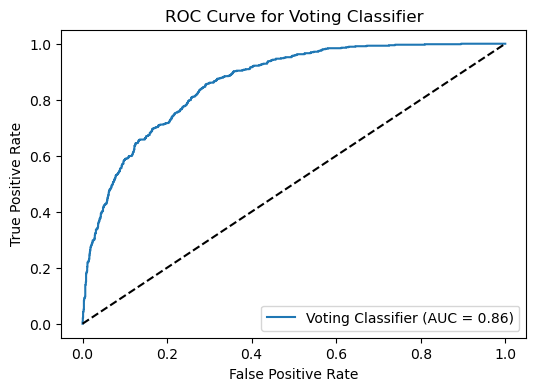

In [269]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
# heatmap for confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#roc curve
y_prob = eclf1.predict_proba(x_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {np.trapz(tpr, fpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping


deep_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = deep_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


y_pred_nn = (deep_model.predict(x_test) > 0.5).astype("int32").flatten()


acc_nn = accuracy_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("--- Deep Neural Network ---")
print("Accuracy:", acc_nn)
print("Recall:", recall_nn)
print("Precision:", precision_nn)
print("F1 Score:", f1_nn)
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7417 - loss: 0.5076 - val_accuracy: 0.7959 - val_loss: 0.4273
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7899 - loss: 0.4525 - val_accuracy: 0.7990 - val_loss: 0.4289
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4440 - val_accuracy: 0.7929 - val_loss: 0.4278
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7797 - loss: 0.4465 - val_accuracy: 0.7939 - val_loss: 0.4252
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7987 - loss: 0.4266 - val_accuracy: 0.7929 - val_loss: 0.4303
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.4334 - val_accuracy: 0.7898 - val_loss: 0.4282
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7839 - loss: 0.4429 - val_accuracy: 0.7949 - val_loss: 0.4319
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.4303 - val_accuracy: 0.

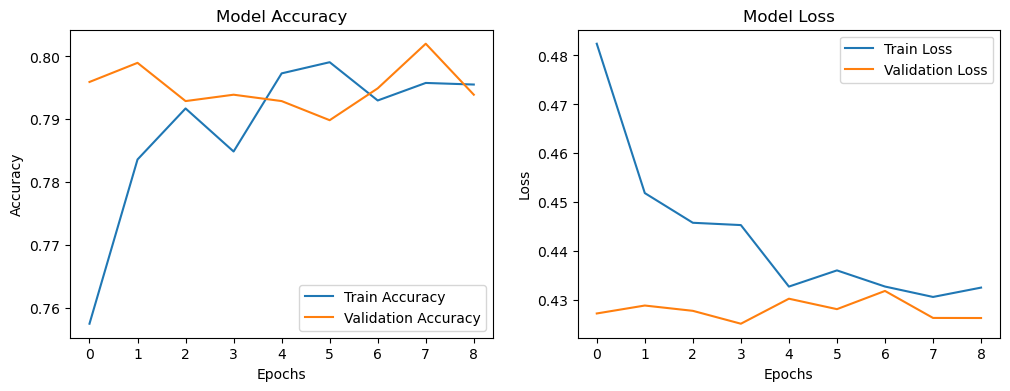

In [267]:
# plot history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [270]:
# save eclf1
import joblib
joblib.dump(eclf1, 'voting_classifier_model.pkl')
# save scaler
joblib.dump(scaler, 'scaler.pkl')
# save label encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']